# Randomizing and reducing the data from 27563 photos to 1000 photos for the uninfected (from malaria) photos and parasitized photos. Each factor should have 500 photos.

### Uninfected with Malaria photos - Randomize

In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
import shutil
import random

In [3]:

# Input folder with all images
input_folder = "../project4/Dataset/cell_images/Uninfected"

# Output folder to store the randomly selected images
output_folder = "../project4/Dataset/clean/output_uninfected"  

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
files = os.listdir(input_folder)

# Shuffle the list of files randomly
random.shuffle(files)

# Number of images to select (100 in this case)
num_images_to_select = 500

# Loop through the first 100 files (randomly shuffled)
for i in range(min(num_images_to_select, len(files))):
    # Get the file path of the current image
    image_path = os.path.join(input_folder, files[i])

    # Move the image to the output folder
    shutil.move(image_path, os.path.join(output_folder, files[i]))

print("Random selection complete.")


Random selection complete.


### Parasitized with Malaria photos - Randomize

In [4]:
# Input folder with all images
input_folder = "../project4/Dataset/cell_images/Parasitized"

# Output folder to store the randomly selected images
output_folder = "../project4/Dataset/clean/output_parasitized"  

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
files = os.listdir(input_folder)

# Shuffle the list of files randomly
random.shuffle(files)

# Number of images to select (100 in this case)
num_images_to_select = 500

# Loop through the first 100 files (randomly shuffled)
for i in range(min(num_images_to_select, len(files))):
    # Get the file path of the current image
    image_path = os.path.join(input_folder, files[i])

    # Move the image to the output folder
    shutil.move(image_path, os.path.join(output_folder, files[i]))

print("Random selection complete.")

Random selection complete.


# Reprocessing the images to go from 150x150 to 25x25 and changing them from RGB to Black and White

### Uninfected with Malaria Photos - Processed

In [5]:
from PIL import Image

# Input and output folder paths
input_folder = "../project4/Dataset/clean/output_uninfected" 
output_folder = "../project4/Dataset/clean/output_uninfected_process"  

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
files = os.listdir(input_folder)

# Loop through each file in the input folder
for file in files:
    # Check if the file is an image 
    if file.endswith((".png")):
        # Open the image
        image_path = os.path.join(input_folder, file)
        image = Image.open(image_path)

        # Resize the image to 25x25 pixels
        new_size = (25, 25)
        resized_image = image.resize(new_size)

        # Convert the image to black and white
        bw_image = resized_image.convert("L")

        # Save the resulting image in the output folder with the same filename
        output_path = os.path.join(output_folder, file)
        # bw_image.save(output_path)
        bw_image.save(output_path)

print("Conversion complete.")


Conversion complete.


### Parasitized with Malaria photos - Processed

In [6]:
# Input and output folder paths
input_folder = "../project4/Dataset/clean/output_parasitized" 
output_folder = "../project4/Dataset/clean/output_parasitized_process"  

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# List all files in the input folder
files = os.listdir(input_folder)

# Loop through each file in the input folder
for file in files:
    # Check if the file is an image 
    if file.endswith((".png")):
        # Open the image
        image_path = os.path.join(input_folder, file)
        image = Image.open(image_path)

        # Resize the image to 25x25 pixels
        new_size = (25, 25)
        resized_image = image.resize(new_size)

        # Convert the image to black and white
        bw_image = resized_image.convert("L")

        # Save the resulting image in the output folder with the same filename
        output_path = os.path.join(output_folder, file)
        # bw_image.save(output_path)

        bw_image.save(output_path)

print("Conversion complete.")

Conversion complete.


# Process of creating a DataFrame

In [7]:
abs_pathu = "../project4/Dataset/clean/output_uninfected_process"
abs_pathp = "../project4/Dataset/clean/output_parasitized_process"
parasitized_folder_path = os.path.join(abs_pathp)
uninfected_folder_path = os.path.join(abs_pathu)

parasitized_avg_colors = []
uninfected_avg_colors = []
i = 0
folder_path = parasitized_folder_path
# Loop through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)
        
        # Load image
        img = cv2.imread(image_path)

        parasitized_avg_colors.append(img.mean())
        i += 1
    if i == 30: break

i = 0
folder_path = uninfected_folder_path
# Loop through the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)
        
        # Load image
        img = cv2.imread(image_path)

        uninfected_avg_colors.append(img.mean())
        i += 1
    if i == 30: break

In [8]:
from PIL import Image
folder_path = "../project4/Dataset/clean/output_parasitized_process"

# Initialize an empty list to store the RGB values for each image
image_flat_values = []

# Loop through the image files and convert each image to an RGB matrix
for image_file in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Construct the full path to the image
        img_path = os.path.join(folder_path, image_file)

        # Read the image using OpenCV
        img = Image.open(img_path)

        image_array = np.array(img)
        # Flatten the matrix to a 1D array
        flattened_pixels = image_array.flatten()

        # Append the values to the list
        image_flat_values.append(flattened_pixels)

# Create a DataFrame where each row represents an image's pixels' RGB values
para_df = pd.DataFrame(image_flat_values)

para_df  # Display the first few rows of the DataFrame

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,8,61,9,0,...,150,81,22,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,37,75,143,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,15,82,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,5,115,165,...,99,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,34,91,...,146,145,146,152,93,69,7,0,0,0
496,0,0,1,75,153,150,154,136,60,23,...,106,110,82,37,3,0,0,0,0,0
497,0,0,0,0,0,0,0,1,8,17,...,164,101,57,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0


In [9]:
para_df = para_df/255
para_df.head()

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.031373,0.239216,0.035294,0.000000,...,0.588235,0.317647,0.086275,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.145098,0.294118,0.560784,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.058824,0.321569,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.019608,0.450980,0.647059,...,0.388235,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
para_df["target"] = 1

In [11]:
from PIL import Image
folder_path2 = "../project4/Dataset/clean/output_uninfected_process"

# Initialize an empty list to store the RGB values for each image
image_flat_values_u = []

# Loop through the image files and convert each image to an RGB matrix
for image_file_u in os.listdir(folder_path2):
    if filename.endswith('.png'):
        # Construct the full path to the image
        img_path_u = os.path.join(folder_path2, image_file_u)

        # Read the image using OpenCV
        img_u = Image.open(img_path_u)

        image_array = np.array(img_u)
        # Flatten the matrix to a 1D array
        flattened_pixels_u = image_array.flatten()

        # Append the values to the list
        image_flat_values_u.append(flattened_pixels_u)

# Create a DataFrame where each row represents an image's pixels' values
uninf_df = pd.DataFrame(image_flat_values_u)

uninf_df  # Display the first few rows of the DataFrame

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0,0,0,0,0,0,0,0,11,82,...,72,50,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,36,115,...,3,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,91,92,35,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,55,157,...,180,181,184,185,98,10,0,0,0,0
4,0,0,0,0,0,0,0,21,88,164,...,109,89,21,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,56,...,103,26,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,115,69,42,0,0,0,0,0,0,0
497,0,0,0,0,0,83,183,183,183,184,...,98,5,4,3,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,30,...,58,12,0,0,0,0,0,0,0,0


In [12]:
uninf_df = uninf_df/255
uninf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043137,0.321569,...,0.282353,0.196078,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.141176,0.450980,...,0.011765,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.356863,0.360784,0.137255,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.215686,0.615686,...,0.705882,0.709804,0.721569,0.72549,0.384314,0.039216,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082353,0.345098,0.643137,...,0.427451,0.349020,0.082353,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [13]:
uninf_df["target"] = 0

In [14]:
final_df = pd.concat([para_df,uninf_df])
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,616,617,618,619,620,621,622,623,624,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.031373,0.239216,0.035294,0.000000,...,0.317647,0.086275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.145098,0.294118,0.560784,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.058824,0.321569,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.019608,0.450980,0.647059,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [15]:
X = final_df.drop(columns = "target").values
y = final_df["target"].values

In [16]:
X = X.reshape(-1,25,25,1)
X

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.19607843],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.65490196],
         [0.24313725],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.03529412],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [17]:
np.unique(y, return_counts=True)

(array([0, 1]), array([500, 500]))

In [22]:
from sklearn.model_selection import train_test_split
# Split your data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 2: Build a CNN Model
model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape = (25,25,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' activation for binary classification
])

# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

# Step 4: Training
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Step 5: Evaluation
test_loss, test_acc = model.evaluate(X, y)
print(f"Test accuracy: {test_acc}")

Epoch 1/50
25/25 [==============================] - 1s 21ms/step - loss: 0.6984 - accuracy: 0.5125
Epoch 2/50
25/25 [==============================] - 1s 30ms/step - loss: 0.6933 - accuracy: 0.4950
Epoch 3/50
25/25 [==============================] - 1s 24ms/step - loss: 0.6939 - accuracy: 0.5125
Epoch 4/50
25/25 [==============================] - 1s 23ms/step - loss: 0.6916 - accuracy: 0.5213
Epoch 5/50
25/25 [==============================] - 1s 23ms/step - loss: 0.6862 - accuracy: 0.5512
Epoch 6/50
25/25 [==============================] - 1s 23ms/step - loss: 0.6884 - accuracy: 0.5412
Epoch 7/50
25/25 [==============================] - 1s 30ms/step - loss: 0.6880 - accuracy: 0.5437
Epoch 8/50
25/25 [==============================] - 1s 24ms/step - loss: 0.6684 - accuracy: 0.6212
Epoch 9/50
25/25 [==============================] - 1s 23ms/step - loss: 0.6614 - accuracy: 0.5950
Epoch 10/50
25/25 [==============================] - 1s 23ms/step - loss: 0.6196 - accuracy: 0.6700
Epoch 11/

In [20]:
accuracy = history.history['accuracy']

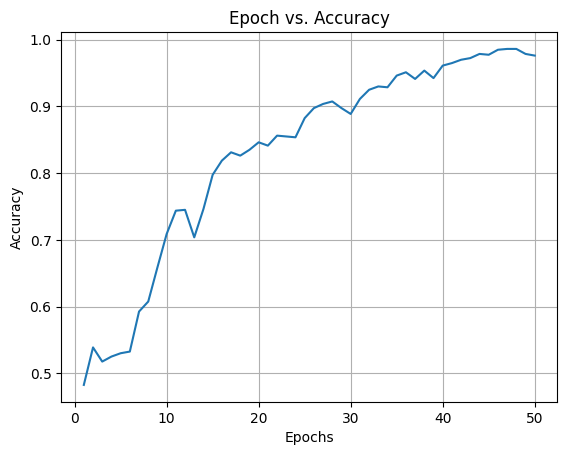

In [21]:
plt.plot(range(1, len(accuracy) + 1), accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch vs. Accuracy')
plt.grid(True)
plt.show()

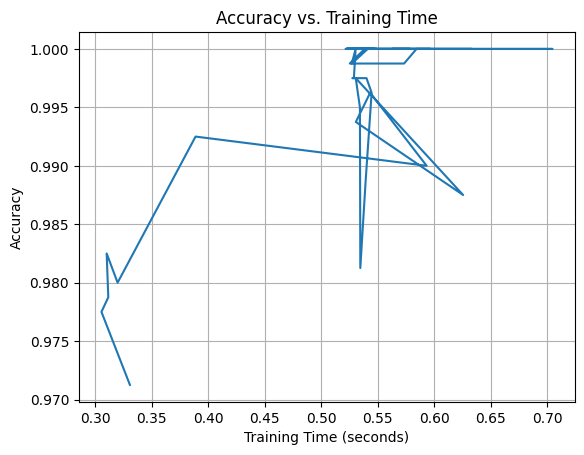

In [23]:
import time

# Create empty lists to store training times and accuracies
training_times = []
accuracies = []

for epoch in range(50):
    start_time = time.time()  # Record start time
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)  # Train for 1 epoch
    end_time = time.time()  # Record end time
    training_time = end_time - start_time  # Calculate training time in seconds

    training_times.append(training_time)
    accuracies.append(history.history['accuracy'][0])

# Plot accuracy vs. time
plt.plot(training_times, accuracies)
plt.xlabel('Training Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Time')
plt.grid(True)
plt.show()